In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline
sns.set(style="whitegrid")


In [5]:
# ডেটা লোড 
df = pd.read_csv('insurance.csv')

# ডেটা দেখবো
display(df.head())
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nBasic stats:")
display(df.describe())


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Basic stats:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


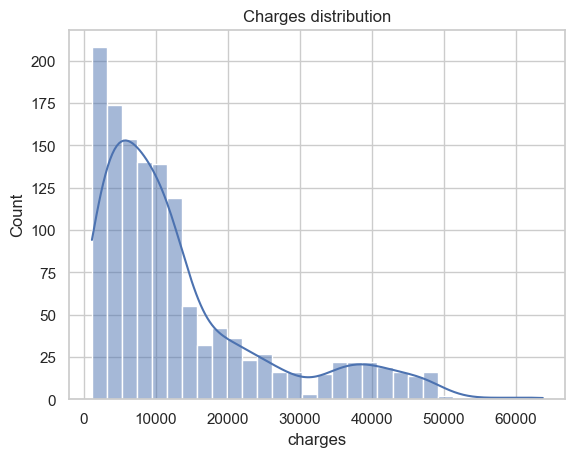

In [ ]:
# charges distribution
plt.figure(figsize=(8,4))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Charges distribution')
plt.show()


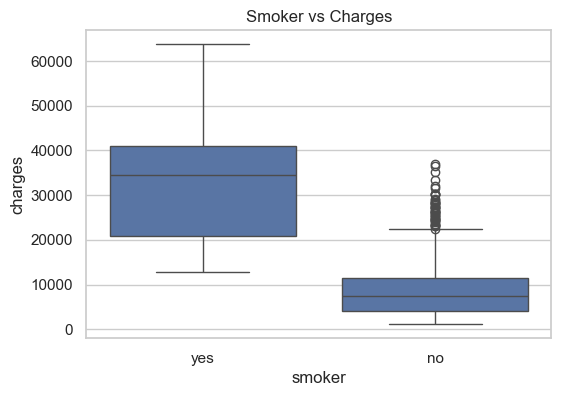

In [22]:
# smoker vs charges boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()


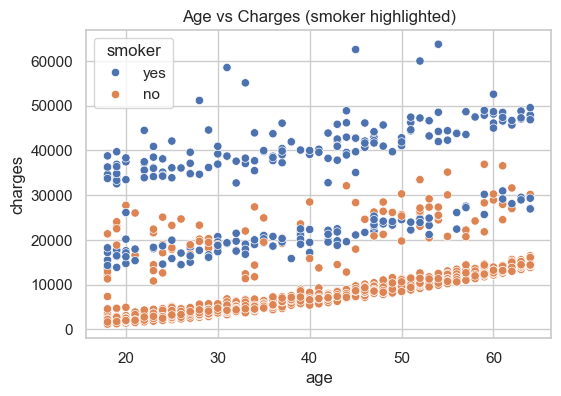

In [23]:
# age vs charges scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Charges (smoker highlighted)')
plt.show()


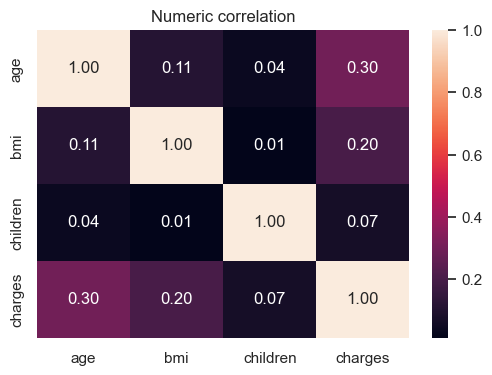

In [24]:
# correlation heatmap for numeric cols
num_cols = ['age','bmi','children','charges']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
plt.title('Numeric correlation')
plt.show()


In [25]:
# duplicate চেক ও drop
print("Before duplicates:", len(df))
df = df.drop_duplicates()
print("After duplicates:", len(df))

Before duplicates: 1338
After duplicates: 1337


In [26]:
# যদি rare category খুব কম হয়ে থাকে তাদের কনসোলিডেট করার দরকার আছে কিনা চেক করো
print(df['region'].value_counts())
print(df['sex'].value_counts())
print(df['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64


In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
X = df.drop('charges', axis=1)
y = df['charges']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


,age,sex,bmi,children,smoker,region
138,54,female,31.900,3,no,southeast
381,55,male,30.685,0,yes,northeast
292,25,male,45.540,2,yes,southeast
1090,47,male,36.190,0,yes,southeast
893,47,male,38.940,2,yes,southeast
...,...,...,...,...,...,...
1096,51,female,34.960,2,yes,northeast
1131,27,male,45.900,2,no,southwest
1295,20,male,22.000,1,no,southwest
861,38,female,28.000,3,no,southwest


In [31]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# যদি train এবং test columns mismatch হয়:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [33]:
from sklearn.metrics import mean_squared_error


# MSE পাওয়া
mse = mean_squared_error(y_test, y_pred)

# RMSE manually
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 4831.400050734648
R2 Score: 0.8635884812544394


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance পাওয়া
importance = model.feature_importances_

# Features-এর নামগুলো
features = X_train.columns

# DataFrame বানানো
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

print(feat_importance)


            Feature  Importance
4        smoker_yes    0.605774
1               bmi    0.209188
0               age    0.140647
2          children    0.021728
3          sex_male    0.006876
6  region_southeast    0.006482
5  region_northwest    0.005552
7  region_southwest    0.003753


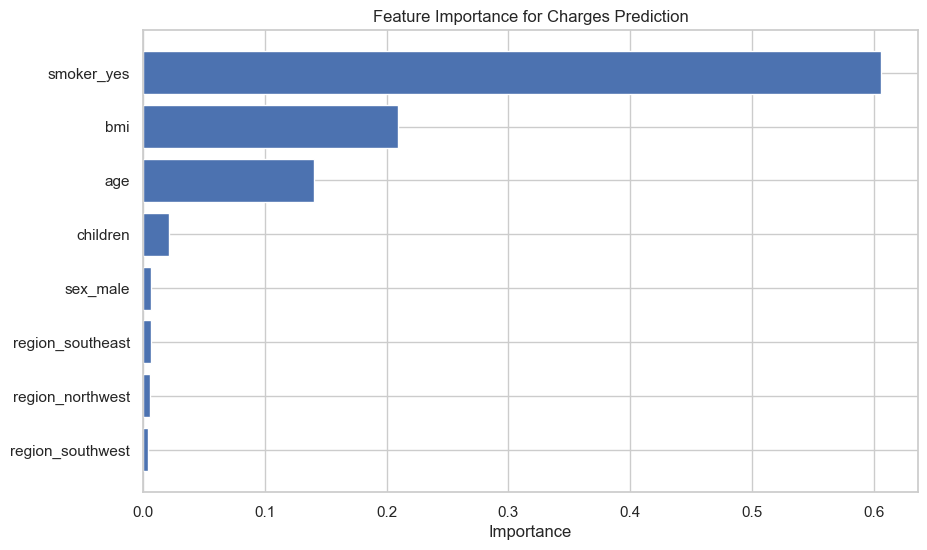

In [35]:
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis()  # সবচেয়ে important উপরে দেখানোর জন্য
plt.xlabel('Importance')
plt.title('Feature Importance for Charges Prediction')
plt.show()


In [36]:
import joblib

# full model train করার পরে
joblib.dump(model, 'full_charges_model.pkl')


['full_charges_model.pkl']